In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree



# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys


sys.path.append(os.path.abspath("../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("../../datos/datos3/datos_sin_outliers_iterativo.csv", index_col=0).reset_index(drop=True)

In [3]:
df_encoded.head()

,price,size_MinMax,bathrooms_MinMax,province_MinMax,municipality_MinMax,distance_MinMax,district_MinMax,propertyType_chalet_MinMax,propertyType_countryHouse_MinMax,propertyType_duplex_MinMax,propertyType_flat_MinMax,propertyType_penthouse_MinMax,propertyType_studio_MinMax,exterior_False_MinMax,exterior_True_MinMax,rooms_0_MinMax,rooms_1_MinMax,rooms_2_MinMax,rooms_3_MinMax,rooms_4_MinMax,status_desconocido_MinMax,status_good_MinMax,status_newdevelopment_MinMax,status_renew_MinMax,floor_1_MinMax,floor_14_MinMax,floor_2_MinMax,floor_3_MinMax,floor_4_MinMax,floor_5_MinMax,floor_6_MinMax,floor_7_MinMax,floor_8_MinMax,floor_bj_MinMax,floor_desconocido_MinMax,floor_en_MinMax,floor_ss_MinMax,floor_st_MinMax,hasLift_False_MinMax,hasLift_True_MinMax,hasLift_desconocido_MinMax,parkingSpace_False_MinMax,parkingSpace_True_MinMax,parkingSpace_desconocido_MinMax,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000
0,750.00,0.31,0.92,1.00,1.00,0.11,0.87,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,750.00,0.39,0.92,1.00,0.73,0.27,0.85,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,400.00,0.36,0.00,1.00,0.09,0.92,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00
3,450.00,0.53,0.92,0.00,0.17,0.79,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,-1.00,-1.00
4,450.00,0.31,0.92,0.00,0.23,0.64,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Separamos en x e y

In [4]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

Separamos en train y test y le hacemos aprender

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [6]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

***K-Fold***

In [7]:
f.metricas(y_train, y_train_pred, y_test, y_test_pred)

,train,test
r2_score,0.68,0.58
MAE,36.87,40.20
MSE,"2,243.46","2,821.82"
RMSE,47.37,53.12


In [8]:
kf= KFold(n_splits=5,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.572953102971447

In [9]:
score_mae= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_absolute_error")
abs(np.mean(score_mae))

41.9385163186326

In [10]:
score_mse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_squared_error")
abs(np.mean(score_mse))

2883.2614904260136

In [11]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

53.61472871028967

In [12]:
kf= KFold(n_splits=200,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

-29.99764089502939

In [13]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

47.60711108635669

**Como seleccionar que variables independientes eliminar si sucede over fitting**

In [14]:

df_coefs=pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coefs.sort_values(by=0, key= abs, ascending=False)    #para que ordene según la importancia

,0
municipality_MinMax,179.23
size_MinMax,113.13
province_MinMax,51.36
floor_st_MinMax,51.13
outliers_ifo_0.1_2000,51.07
district_MinMax,48.41
hasLift_desconocido_MinMax,47.90
floor_8_MinMax,41.31
propertyType_studio_MinMax,-40.40
floor_14_MinMax,40.08


### Como ya me di cuenta de que no parece ser una relación lineal paso a decision tree

**DECISION TREE**  
Separa los datos en nodos y luego hace la media en el nodo final de la variable dependiente para los datos que se encuentran en ese nodo y cuando tenga que predecir, si el dato acaba en ese nodo, se le aplicará esa media como valor de su variable dependiente.  
   
***Para elegir el mejor árbol de decisión (conformado de unas variables independientes concretas)***   
Calcula la suma de los errores al cuadrado dividido entre n del nodo final de cada arbol y compara ese error y se queda con el que tenga el error mínimo
  
- Si hay mucha profundidad, los nodos finales van a ser tan específicos que se va a dar over fitting
  
***Como decirle que pare de dividir para evitar el Over Fitting***  
- max_depth (profundida máxima del árbol)
- min_sample_split (numero de datos minimo en el nodo (madre) para que se pueda dividir)  
- min_sample_leaf (numero de datos minimo que tienen que tener los nodos(hijos) en los que me divido) 
- max_leaf_nodes (numero maximo de nodos que quiero que tenga mi arbol)  
- max_features (numero máximo de variables independientes que queremos)

Pruebo primero a ver cómo me lo hace 

In [15]:
modelo_arbol_vacio= DecisionTreeRegressor()         
modelo_arbol_vacio.fit(x_train, y_train)
y_pred_test_arb_vacio= modelo_arbol_vacio.predict(x_test)
y_pred_train_arb_vacio= modelo_arbol_vacio.predict(x_train)
df_metricas_arbol_vacio= f.metricas(y_train, y_pred_train_arb_vacio, y_test, y_pred_test_arb_vacio)
df_metricas_arbol_vacio

,train,test
r2_score,1.00,0.53
MAE,0.03,40.80
MSE,0.14,"3,155.51"
RMSE,0.37,56.17


Dejándole a él sólo me da que se produce overfitting

In [16]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

grid_search_arbol=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [17]:
modelo_final_arbol=grid_search_arbol.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=10, min_samples_leaf=10,
                      min_samples_split=10)

In [18]:
y_pred_test_arb= modelo_final_arbol.predict(x_test)
y_pred_train_arb= modelo_final_arbol.predict(x_train)
df_metricas_arbol= f.metricas(y_train, y_pred_train_arb, y_test, y_pred_test_arb)
df_metricas_arbol=df_metricas_arbol.T
df_metricas_arbol.reset_index(inplace=True)
df_metricas_arbol



,index,r2_score,MAE,MSE,RMSE
0,train,0.74,31.26,"1,871.40",43.26
1,test,0.71,34.49,"1,971.60",44.40


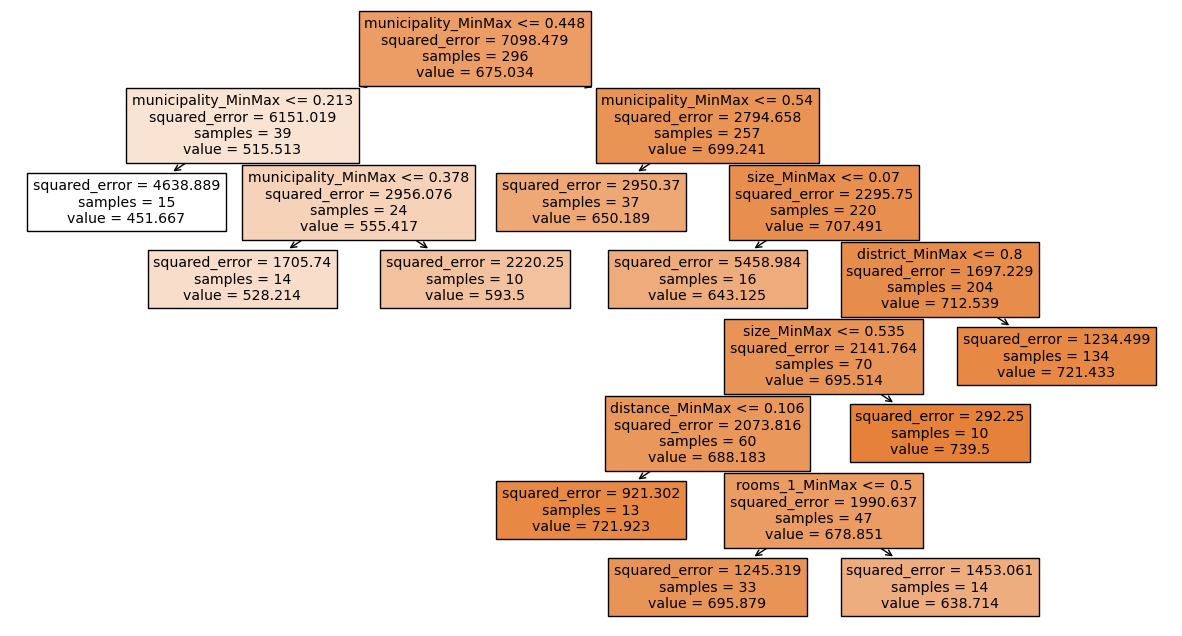

In [19]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol, feature_names=x.columns, filled=True);

### **Este es el modelo inicial sobre el que cambiar los parametros para mejorar las métricas y por ende el modelo**

### Vamos a graficarlo porque así se entienden mejor

In [20]:
df_resultados_arbol=pd.DataFrame(grid_search_arbol.cv_results_)

In [21]:
df_resultados_arbol.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
240,0.01,0.00,0.01,0.00,7,10,10,10,"{'max_depth': 7, 'max_leaf_nodes': 10, 'min_sa...","-2,841.32","-3,075.52","-2,462.84","-2,764.62","-2,391.11","-2,707.08",251.62,1
336,0.01,0.00,0.01,0.01,10,10,10,10,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...","-2,841.32","-3,075.52","-2,462.84","-2,764.62","-2,391.11","-2,707.08",251.62,1


In [22]:
df_resultados_arbol.shape   #no da el número de modelos que ha generado el árbol 

(384, 17)

In [23]:
df_resultados_arbol_filtrado=df_resultados_arbol.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado["MSE"]= df_resultados_arbol["mean_test_score"]
df_resultados_arbol_filtrado.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,4,10,10,"-3,202.24"
1,3,4,10,50,"-3,117.46"
2,3,4,10,100,"-3,117.32"
3,3,4,10,200,"-3,190.73"
4,3,4,50,10,"-4,063.38"


In [24]:
df_rmse_profun= np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun.head()

,param_max_depth,MSE
0,3,70.03
1,5,69.95
2,7,69.96
3,10,69.95


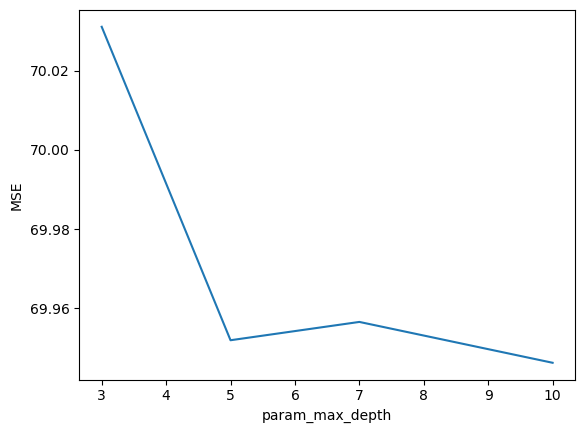

In [25]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun);

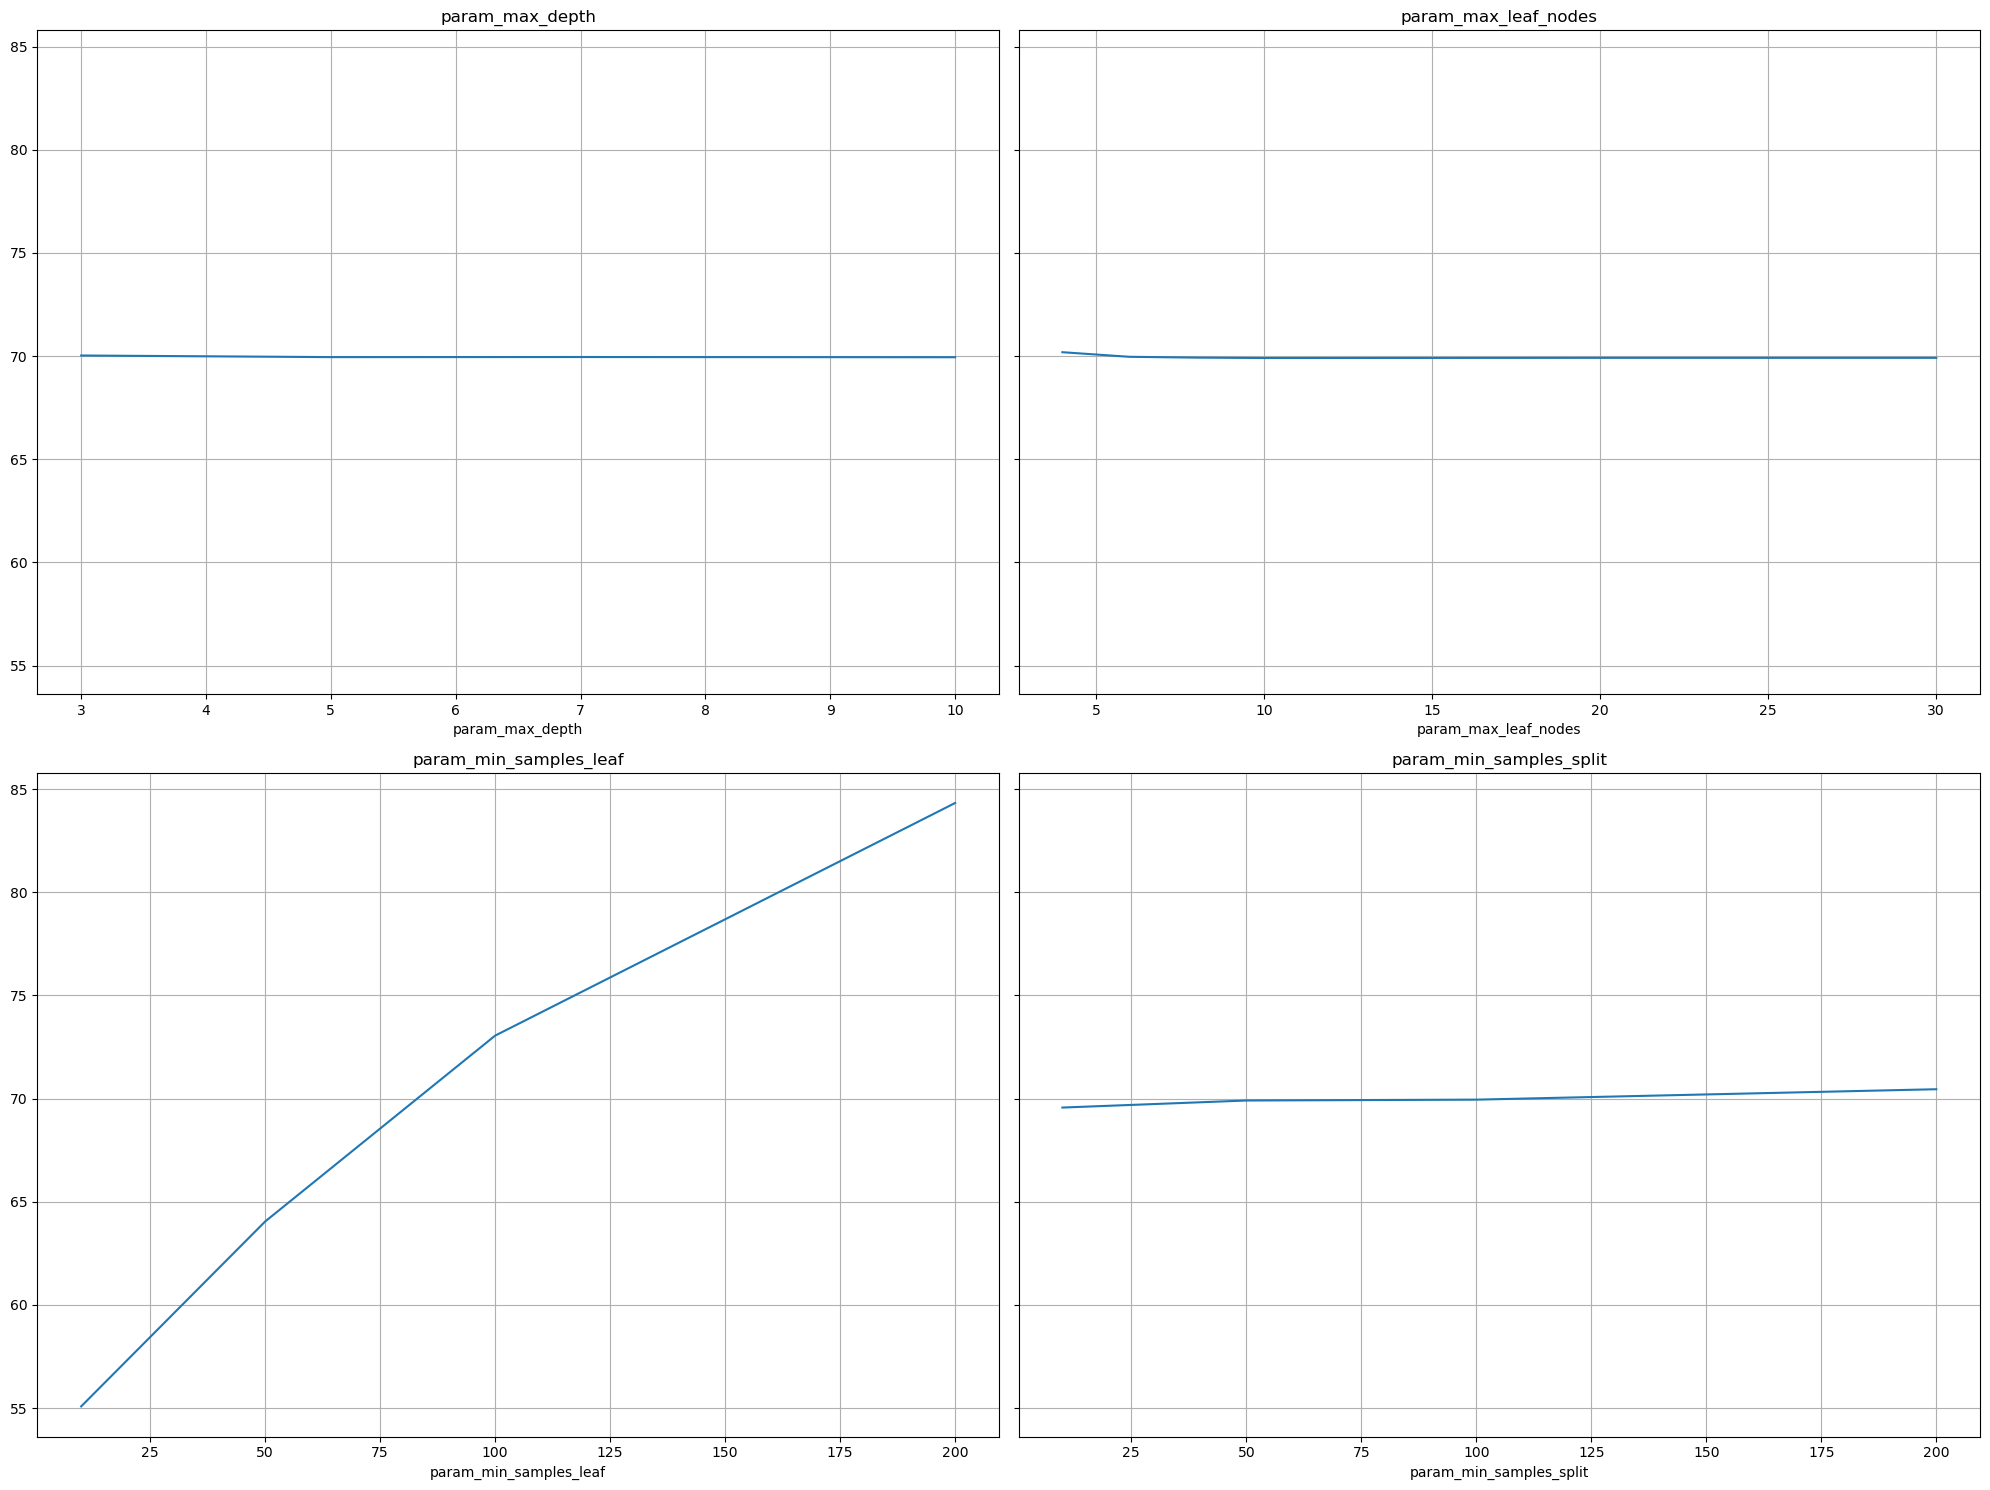

In [26]:

df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [27]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False)

,Importancia
municipality_MinMax,0.89
size_MinMax,0.06
rooms_1_MinMax,0.02
district_MinMax,0.02
distance_MinMax,0.01
parkingSpace_desconocido_MinMax,0.00
floor_bj_MinMax,0.00
floor_desconocido_MinMax,0.00
floor_en_MinMax,0.00
floor_ss_MinMax,0.00


## Lo pruebo cambiando parametros

In [28]:
# Parámetros a evaluar
params_arbol_prueba = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [7,8,9,10,15,25,35],
    'min_samples_leaf': [7,8,9,10,15,25,35],
    'max_leaf_nodes': [1,2,3,4,5,6,7,8,9]
}

grid_search_arbol_prueba=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol_prueba , cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol_prueba.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [7, 8, 9, 10, 15, 25, 35],
                         'min_samples_split': [7, 8, 9, 10, 15, 25, 35]},
             scoring='neg_mean_squared_error')

In [29]:
modelo_final_arbol_prueba=grid_search_arbol_prueba.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol_prueba

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=9, min_samples_leaf=9,
                      min_samples_split=7)

In [30]:
y_pred_test_arb_prueba= modelo_final_arbol_prueba.predict(x_test)
y_pred_train_arb_prueba= modelo_final_arbol_prueba.predict(x_train)
df_metricas_arbol_prueba= f.metricas(y_train, y_pred_train_arb_prueba, y_test, y_pred_test_arb_prueba)

df_metricas_arbol_prueba=df_metricas_arbol_prueba.T
df_metricas_arbol_prueba.reset_index(inplace=True)
df_metricas_arbol_prueba

,index,r2_score,MAE,MSE,RMSE
0,train,0.73,32.72,"1,938.92",44.03
1,test,0.72,33.19,"1,858.32",43.11


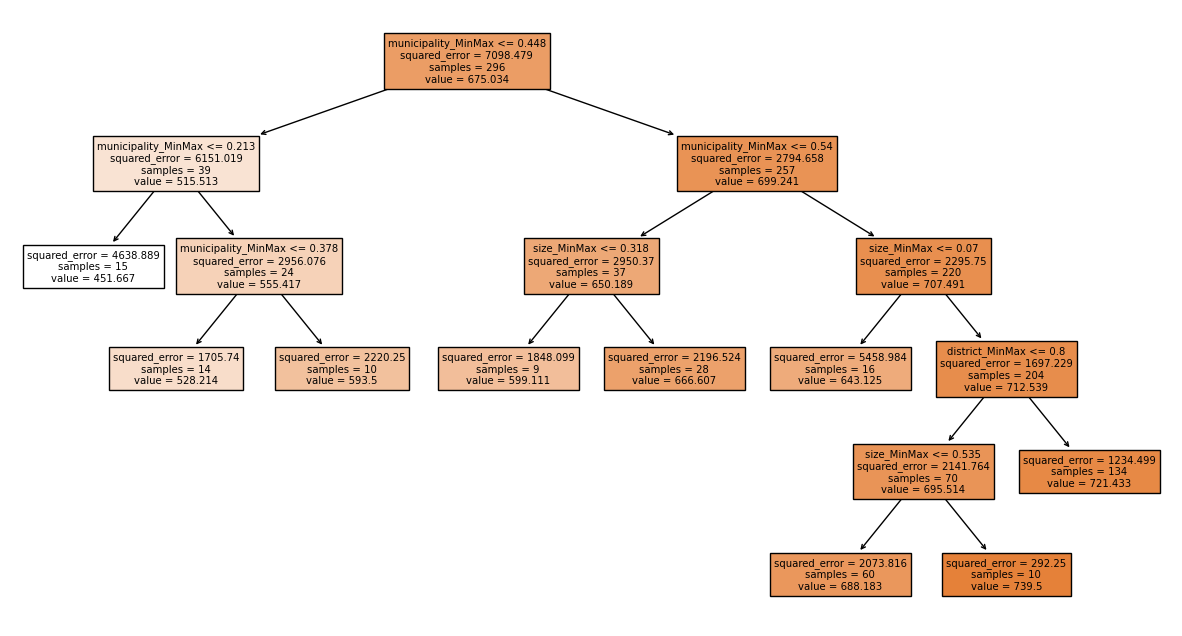

In [31]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol_prueba, feature_names=x.columns, filled=True);

AHORA QUE SABEMOS QUE LA MEJOR DEPTH ES 60 ESTARÍA BIEN COMPARAR LA 10,11 Y 12 PARA VER SI SIGUE SIENDO LA MEJOR EL 10

### Vamos a graficarlo porque así se entienden mejor

In [32]:
df_resultados_arbol_prueba=pd.DataFrame(grid_search_arbol_prueba.cv_results_)

In [33]:
df_resultados_arbol_prueba.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1733,0.01,0.00,0.01,0.00,6,9,9,15,"{'max_depth': 6, 'max_leaf_nodes': 9, 'min_sam...","-2,490.25","-3,282.03","-2,503.36","-2,665.16","-2,209.72","-2,630.10",357.38,1
1732,0.01,0.00,0.01,0.00,6,9,9,10,"{'max_depth': 6, 'max_leaf_nodes': 9, 'min_sam...","-2,490.25","-3,282.03","-2,503.36","-2,665.16","-2,209.72","-2,630.10",357.38,1


In [34]:
df_resultados_arbol_prueba.shape   #no da el número de modelos que ha generado el árbol 

(2646, 17)

In [35]:
df_resultados_arbol_filtrado_prueba=df_resultados_arbol_prueba.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_prueba["MSE"]= df_resultados_arbol_prueba["mean_test_score"]
df_resultados_arbol_filtrado_prueba.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,1,7,7,NaN
1,3,1,7,8,NaN
2,3,1,7,9,NaN
3,3,1,7,10,NaN
4,3,1,7,15,NaN


In [36]:
df_rmse_profun_prueba= np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_prueba.head()

,param_max_depth,MSE
0,3,55.78
1,4,55.56
2,5,55.57
3,6,55.53
4,7,55.53


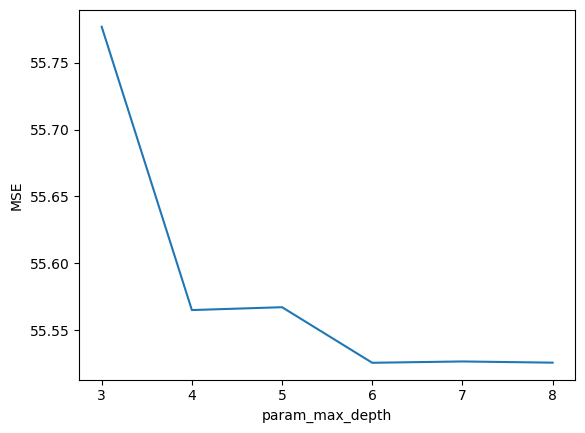

In [37]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_prueba);

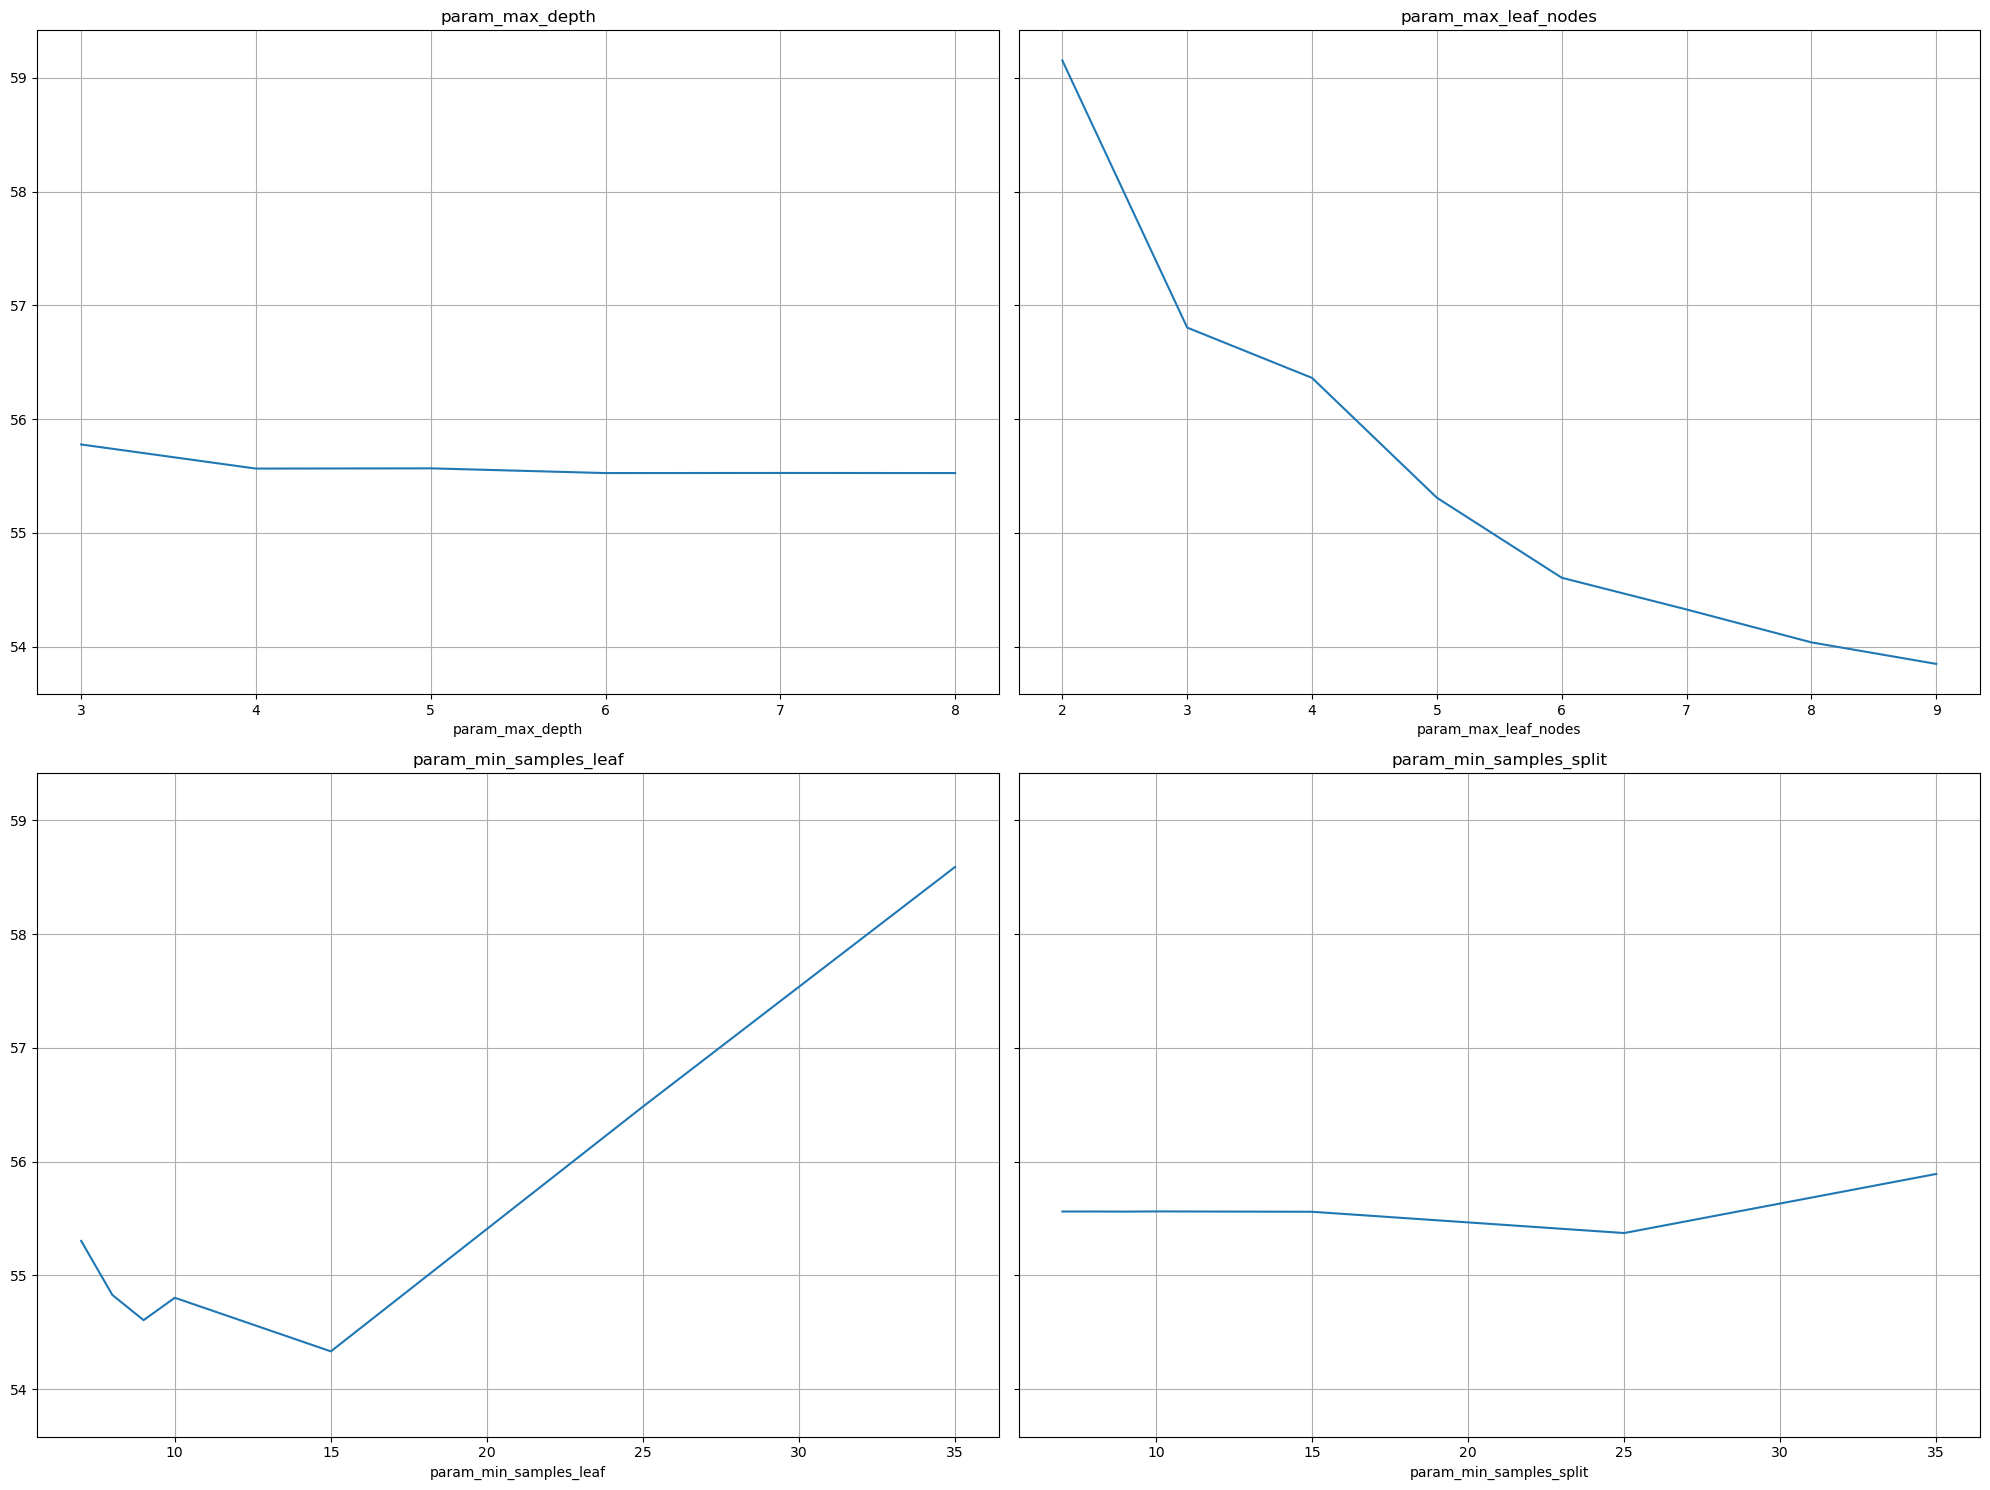

In [38]:

df_rmse_profun_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_prueba = pd.DataFrame(df_rmse_profun_prueba).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_prueba.columns[:-1]):
    df_rmse_col_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_prueba.index, y=df_rmse_col_prueba.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [39]:
pd.DataFrame(modelo_final_arbol_prueba.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
municipality_MinMax,0.90
size_MinMax,0.08
district_MinMax,0.02
parkingSpace_desconocido_MinMax,0.00
floor_8_MinMax,0.00


De momento parece que mi primera opción de parámetros me da los mejores resultados.

In [40]:
# Parámetros a evaluar
params_arbolu = {
    'max_depth': [7, 8,10, 30, 50, 70, 100,200,300],
    'min_samples_split': [6,8,10,20,25,30,35,40, 50, 500, 2000],
    'min_samples_leaf': [1,3,6,7,8,10,20,30, 50, 500, 2000],
    'max_leaf_nodes': [8, 10,50, 60, 70,80,90,100,150, 200,2000]
}

grid_search_arbolu=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbolu, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbolu.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 10, 30, 50, 70, 100, 200, 300],
                         'max_leaf_nodes': [8, 10, 50, 60, 70, 80, 90, 100, 150,
                                            200, 2000],
                         'min_samples_leaf': [1, 3, 6, 7, 8, 10, 20, 30, 50,
                                              500, 2000],
                         'min_samples_split': [6, 8, 10, 20, 25, 30, 35, 40, 50,
                                               500, 2000]},
             scoring='neg_mean_squared_error')

In [41]:
modelo_final_arbolu=grid_search_arbolu.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbolu

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=50, min_samples_leaf=8,
                      min_samples_split=30)

In [42]:
y_pred_test_arbu= modelo_final_arbolu.predict(x_test)
y_pred_train_arbu= modelo_final_arbolu.predict(x_train)
df_metricas_arbolu= f.metricas(y_train, y_pred_train_arbu, y_test, y_pred_test_arbu)
df_metricas_arbolu=df_metricas_arbolu.T
df_metricas_arbolu.reset_index(inplace=True)
df_metricas_arbolu

,index,r2_score,MAE,MSE,RMSE
0,train,0.76,30.46,"1,738.75",41.70
1,test,0.65,37.54,"2,322.62",48.19


### Vamos a graficarlo porque así se entienden mejor

In [43]:
df_resultados_arbol_prueba=pd.DataFrame(grid_search_arbolu.cv_results_)

In [44]:
df_resultados_arbol_prueba.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2469,0.01,0.00,0.01,0.01,8,200,8,30,"{'max_depth': 8, 'max_leaf_nodes': 200, 'min_s...","-2,714.80","-3,254.30","-1,909.53","-2,445.74","-2,397.68","-2,544.41",439.84,1
1743,0.01,0.00,0.01,0.00,8,60,8,30,"{'max_depth': 8, 'max_leaf_nodes': 60, 'min_sa...","-2,714.80","-3,254.30","-1,909.53","-2,445.74","-2,397.68","-2,544.41",439.84,1


In [45]:
df_resultados_arbol_prueba.shape   #no da el número de modelos que ha generado el árbol 

(11979, 17)

In [46]:
df_resultados_arbol_filtrado_prueba=df_resultados_arbol_prueba.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_prueba["MSE"]= df_resultados_arbol_prueba["mean_test_score"]
df_resultados_arbol_filtrado_prueba.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,7,8,1,6,"-3,221.31"
1,7,8,1,8,"-3,182.21"
2,7,8,1,10,"-3,182.21"
3,7,8,1,20,"-3,023.00"
4,7,8,1,25,"-2,891.28"


In [47]:
df_rmse_profun_prueba= np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_prueba.head()

,param_max_depth,MSE
0,7,66.30
1,8,66.26
2,10,66.31
3,30,66.31
4,50,66.32


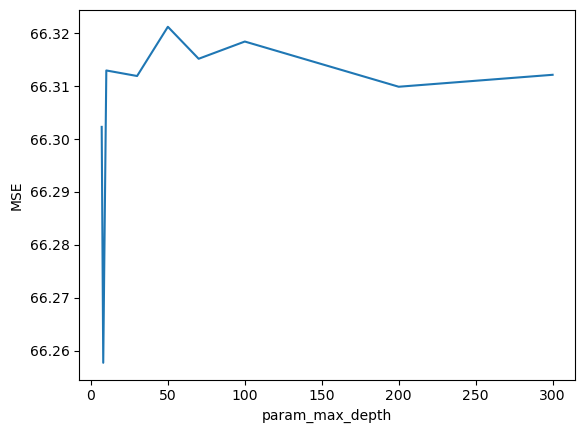

In [48]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_prueba);

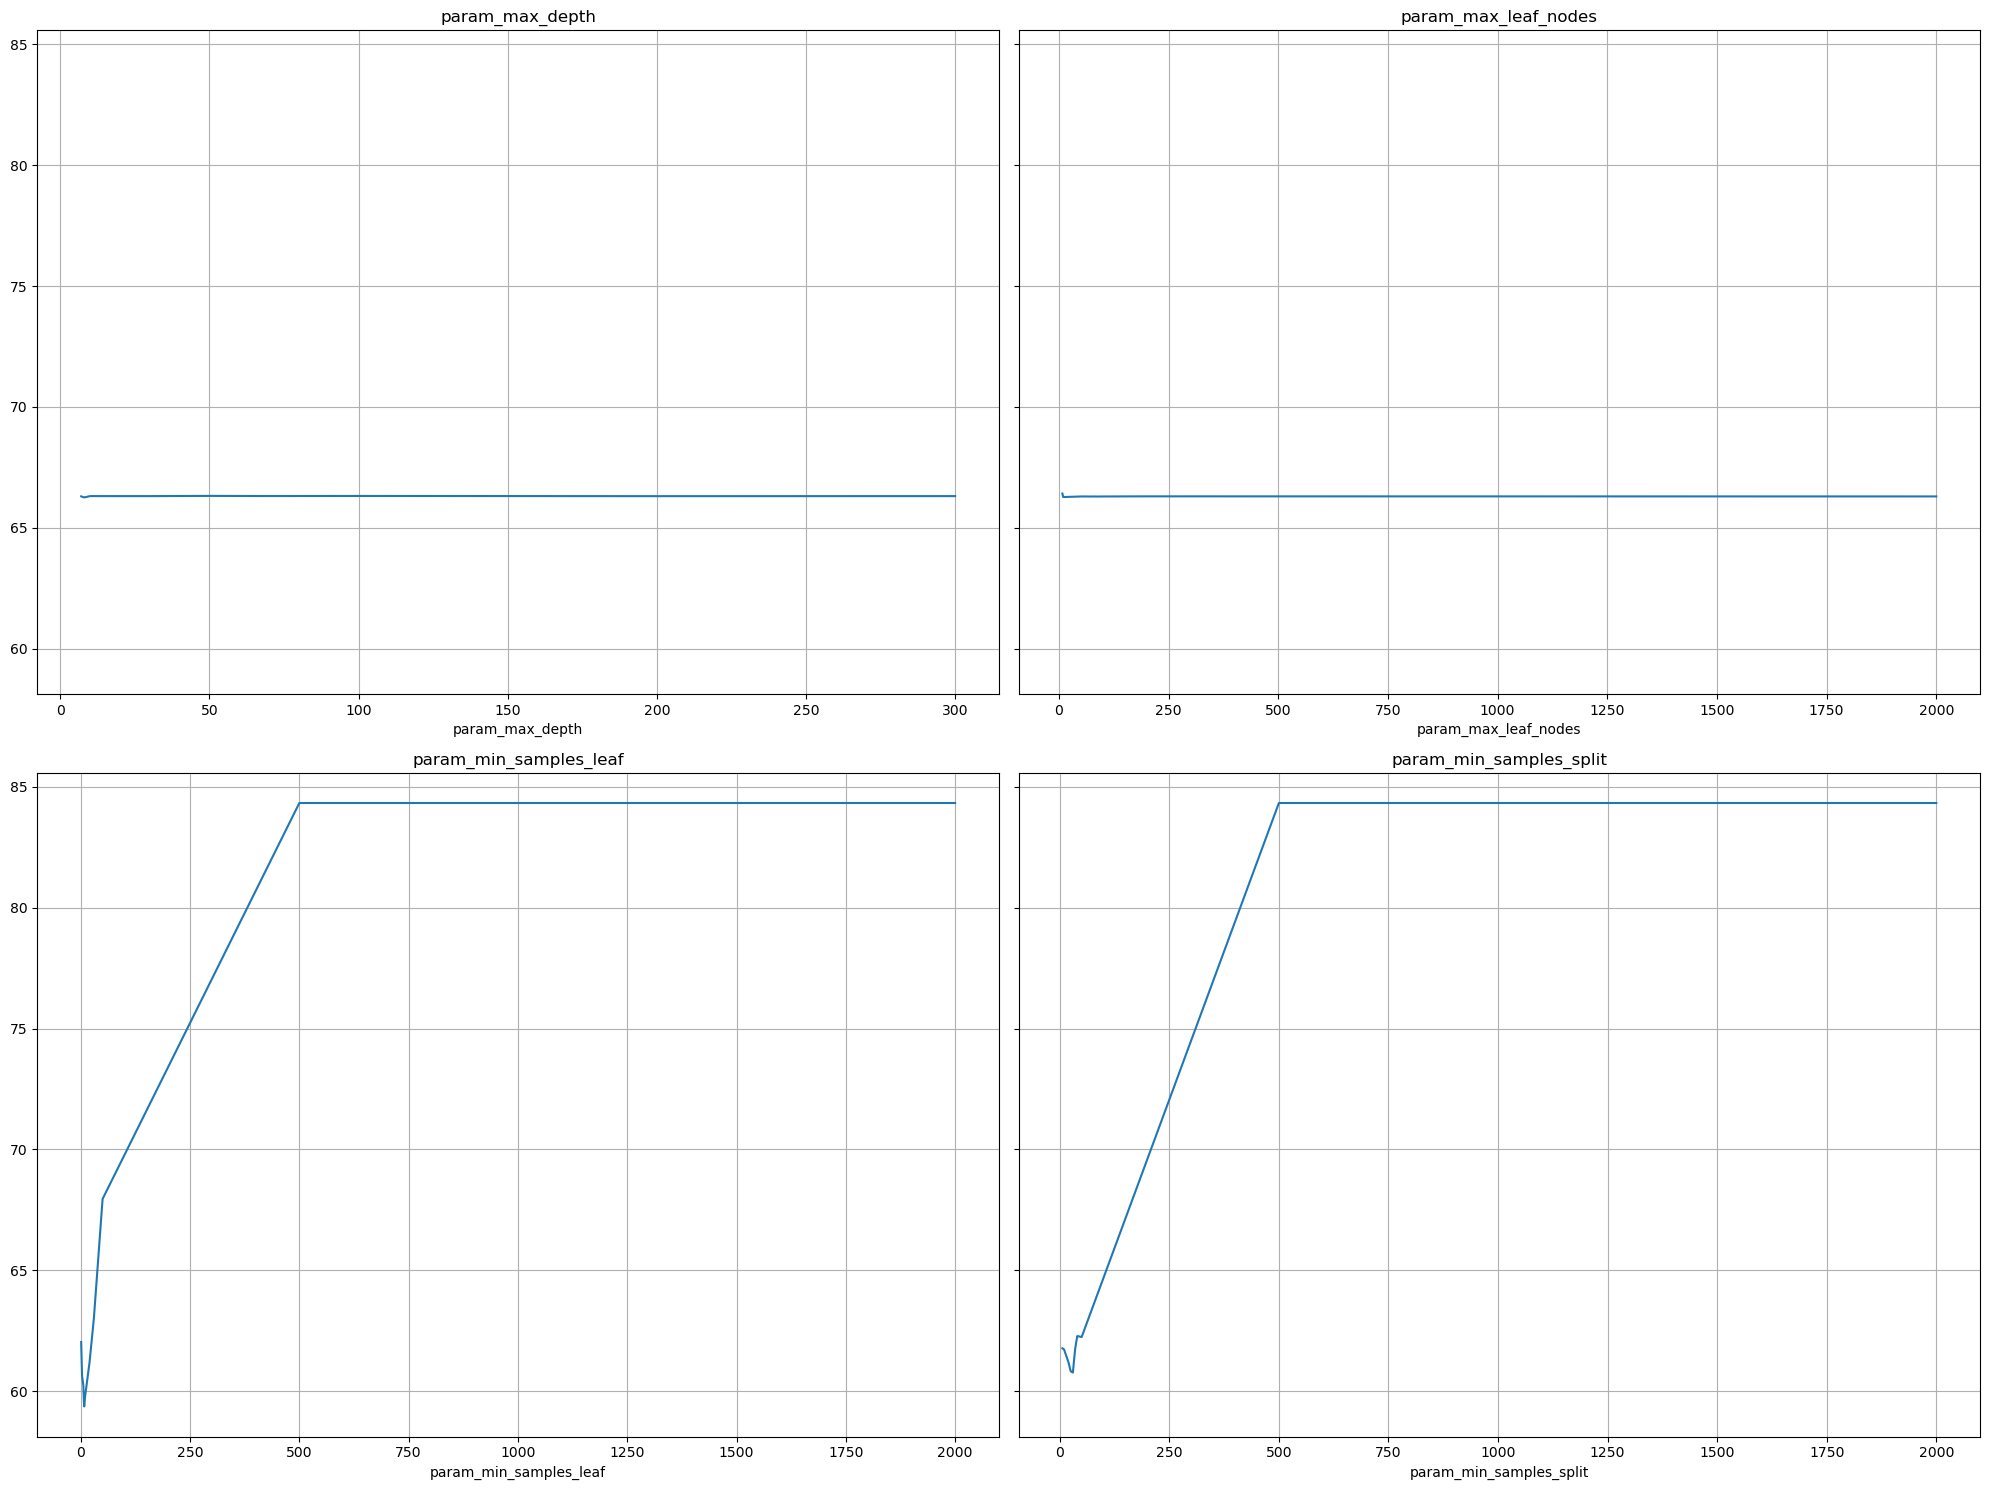

In [49]:

df_rmse_profun_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_prueba = pd.DataFrame(df_rmse_profun_prueba).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_prueba.columns[:-1]):
    df_rmse_col_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_prueba.index, y=df_rmse_col_prueba.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [50]:
pd.DataFrame(modelo_final_arbol_prueba.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
municipality_MinMax,0.90
size_MinMax,0.08
district_MinMax,0.02
parkingSpace_desconocido_MinMax,0.00
floor_8_MinMax,0.00


**probamos una última combinación de parametros para el modelo**

In [51]:
# Parámetros a evaluar
params_ult = {
    'max_depth': [7],
    'min_samples_split': [30],
    'min_samples_leaf': [7],
    'max_leaf_nodes': [9]
}

grid_search_ult=GridSearchCV(DecisionTreeRegressor(), param_grid=params_ult, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_ult.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7], 'max_leaf_nodes': [9],
                         'min_samples_leaf': [7], 'min_samples_split': [30]},
             scoring='neg_mean_squared_error')

In [52]:
modelo_final_ult=grid_search_ult.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_ult

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=9, min_samples_leaf=7,
                      min_samples_split=30)

In [53]:
y_pred_test_ult= modelo_final_ult.predict(x_test)
y_pred_train_ult= modelo_final_ult.predict(x_train)
df_metricas_ult= f.metricas(y_train, y_pred_train_ult, y_test, y_pred_test_ult)
df_metricas_ult=df_metricas_ult.T
df_metricas_ult.reset_index(inplace=True)
df_metricas_ult

,index,r2_score,MAE,MSE,RMSE
0,train,0.72,32.88,"1,959.09",44.26
1,test,0.69,35.97,"2,113.63",45.97


In [54]:
pd.DataFrame(modelo_final_ult.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
municipality_MinMax,0.89
size_MinMax,0.08
district_MinMax,0.02
distance_MinMax,0.01
parkingSpace_desconocido_MinMax,0.00


PARA PODER COMPARAR MEJOR LOS MODELOS

In [55]:
dicc={0: "modelo1",
      1: "modelo1",
      2: "modelo2",
      3: "modelo2",
      4: "modelo3",
      5: "modelo3",
      6: "modelo4",
      7: "modelo4"}

In [56]:
df_final=pd.DataFrame()
df_final=pd.concat([df_final,df_metricas_arbolu, df_metricas_arbol_prueba,df_metricas_arbol,df_metricas_ult], axis=0, ignore_index=True)
df_final.reset_index(inplace=True)
df_final["level_0"]=df_final["level_0"].map(dicc)
df_final['diff_r2_score'] = df_final.groupby('level_0')['r2_score'].transform(lambda x: x.iloc[0] - x.iloc[1])
df_final['diff_RMSE'] = df_final.groupby('level_0')['RMSE'].transform(lambda x: x.iloc[0] - x.iloc[1])

df_final

,level_0,index,r2_score,MAE,MSE,RMSE,diff_r2_score,diff_RMSE
0,modelo1,train,0.76,30.46,"1,738.75",41.70,0.10,-6.50
1,modelo1,test,0.65,37.54,"2,322.62",48.19,0.10,-6.50
2,modelo2,train,0.73,32.72,"1,938.92",44.03,0.00,0.92
3,modelo2,test,0.72,33.19,"1,858.32",43.11,0.00,0.92
4,modelo3,train,0.74,31.26,"1,871.40",43.26,0.03,-1.14
5,modelo3,test,0.71,34.49,"1,971.60",44.40,0.03,-1.14
6,modelo4,train,0.72,32.88,"1,959.09",44.26,0.04,-1.71
7,modelo4,test,0.69,35.97,"2,113.63",45.97,0.04,-1.71


## Elección de mejor modelo:  
Comparando los modelos nos damos cuenta que el modelo mejor equilibrado es el modelo 2 (tiene metricas bastante buenas y el menor over fitting)  
  
**Finalmente me quedo con el modelo 2 correspondiente al segundo modelo**  
Estos son sus parametros:  
    'max_depth': [6],  
    'min_samples_split': [7],  
    'min_samples_leaf': [9],  
    'max_leaf_nodes': [9]

In [57]:
df_metricas_arbol_prueba.drop(columns= "index", inplace=True)

In [58]:
df_metricas_arbol_prueb=df_metricas_arbol_prueba.T
df_metricas_arbol_prueb.columns= ["train", "test"]
df_metricas_arbol_prueb.reset_index(inplace=True)
df_metricas_arbol_prueb

,index,train,test
0,r2_score,0.73,0.72
1,MAE,32.72,33.19
2,MSE,"1,938.92","1,858.32"
3,RMSE,44.03,43.11


In [59]:
df_metricas_arbol_prueb

,index,train,test
0,r2_score,0.73,0.72
1,MAE,32.72,33.19
2,MSE,"1,938.92","1,858.32"
3,RMSE,44.03,43.11


Vamos a intentar visualizar las cositas

In [60]:
predytest=pd.DataFrame(y_pred_test_arb_prueba, columns=["y_pred_test_arb_prueba"])

In [61]:
predytrain=pd.DataFrame(y_pred_train_arb_prueba, columns=["y_pred_train_arb_prueba"])

In [62]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytest, predytrain, y], ignore_index=True, axis=1)

In [63]:
df_fin.columns= ["test_prediccion", "train_prediccion", "precio_original"]

In [64]:
df_fin.reset_index(inplace=True)

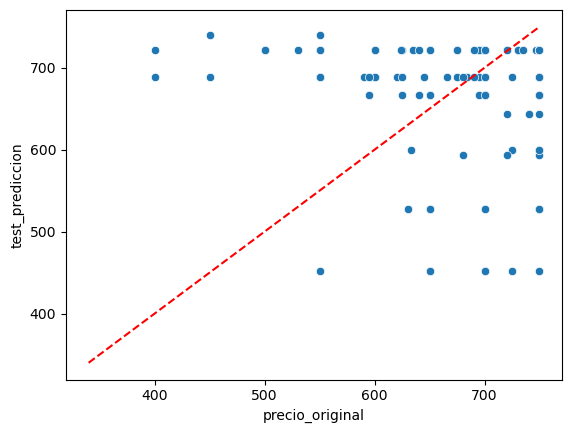

In [65]:
sns.scatterplot(x="precio_original", y="test_prediccion", data= df_fin)
plt.plot([df_fin["precio_original"].min(), df_fin["precio_original"].max()],
         [df_fin["precio_original"].min(), df_fin["precio_original"].max()],
         color='red', linestyle='--', label='x = y')

***CONCLUSIONES DE ESTE segundo MODELO PARA INTENTAR MEJORAR***  
  
- Este modelo 2 me predice mal los precios 400-570 aproximadamente (me predice las viviendas baratas como caras)  y un poco los precios de 650-750 (algunas viviendas caras me las predice como baratas)  
